In [69]:
import pandas as pd

In [70]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
import string

In [72]:
import nltk    
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk import tokenize    

[nltk_data] Downloading package punkt to
[nltk_data]     /home/mardoniofranca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
import multiprocessing

from gensim.models import Word2Vec

In [74]:
from gensim.models import word2vec

In [75]:
file = open('../../txt/auto_compadecida_2.txt')

In [76]:
sentences = file.readlines()

In [77]:
len(sentences)

3816

In [78]:
def clear(s):
    f = s
    f = s.lower()    
    symbols = ['\n', '“', '”', '"']
    for sy in symbols:
        f = f.replace(sy, " ")
    f = f.replace("'", " ")
    return f       

In [79]:
def get_words(txt):
    words = tokenize.word_tokenize(txt, language='portuguese')
    words = [word.lower() for word in words if word.isalpha()] #remove punctuation
                                                               #remove preposic, conjunc
    return words

In [80]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [81]:
txt = ''
for s in sentences :
    txt = txt + clear(s)

In [82]:
sentences = sent_tokenize(txt)

In [83]:
len(sentences)

2379

In [84]:
sentences[0]

'o grande acontecimento do primeiro festival de amadores nacionais, realizado em janeiro de 1957, no rio de janeiro, por iniciativa da fundação brasileira de teatro, foi a representação pelo teatro adolescente do recife, sob a direção de clênio wanderlei, do auto da compadecida, de ariano suassuna.'

In [85]:
words = tokenize.word_tokenize(sentences[0], language='portuguese')    

In [86]:
get_words(sentences[0])

['o',
 'grande',
 'acontecimento',
 'do',
 'primeiro',
 'festival',
 'de',
 'amadores',
 'nacionais',
 'realizado',
 'em',
 'janeiro',
 'de',
 'no',
 'rio',
 'de',
 'janeiro',
 'por',
 'iniciativa',
 'da',
 'fundação',
 'brasileira',
 'de',
 'teatro',
 'foi',
 'a',
 'representação',
 'pelo',
 'teatro',
 'adolescente',
 'do',
 'recife',
 'sob',
 'a',
 'direção',
 'de',
 'clênio',
 'wanderlei',
 'do',
 'auto',
 'da',
 'compadecida',
 'de',
 'ariano',
 'suassuna']

In [87]:
corpus = []
for s in sentences:
    corpus.append(get_words(s))

In [88]:
stok = nltk.data.load('tokenizers/punkt/portuguese.pickle')

In [89]:
stok

In [90]:
corpus

[['o',
  'grande',
  'acontecimento',
  'do',
  'primeiro',
  'festival',
  'de',
  'amadores',
  'nacionais',
  'realizado',
  'em',
  'janeiro',
  'de',
  'no',
  'rio',
  'de',
  'janeiro',
  'por',
  'iniciativa',
  'da',
  'fundação',
  'brasileira',
  'de',
  'teatro',
  'foi',
  'a',
  'representação',
  'pelo',
  'teatro',
  'adolescente',
  'do',
  'recife',
  'sob',
  'a',
  'direção',
  'de',
  'clênio',
  'wanderlei',
  'do',
  'auto',
  'da',
  'compadecida',
  'de',
  'ariano',
  'suassuna'],
 ['se',
  'a',
  'interpretação',
  'era',
  'boa',
  'considerado',
  'aquilo',
  'que',
  'se',
  'pode',
  'exigir',
  'de',
  'um',
  'grupo',
  'amador',
  'novo',
  'e',
  'constituído',
  'de',
  'elementos',
  'jovens',
  'e',
  'portanto',
  'até',
  'certo',
  'ponto',
  'inexperientes',
  'o',
  'que',
  'por',
  'outro',
  'lado',
  'tinha',
  'a',
  'vantagem',
  'de',
  'dar',
  'ao',
  'espetáculo',
  'um',
  'tom',
  'de',
  'simplicidade',
  'de',
  'despojamento',
 

In [91]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
print(cores)

8


In [109]:
model = Word2Vec(min_count=20,
                     window=6,
                     size = 300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [110]:
model.build_vocab(corpus, progress_per=10000)

In [111]:
model.train(corpus, total_examples=len(l_sentence), epochs=100, report_delay=1)

(138189, 2235400)

In [95]:
model.init_sims(replace=True)

In [98]:
#model.wv.most_similar(positive=["cavalo"])

In [102]:
#model.wv.most_similar(positive=["inferno"])

In [112]:
model.wv.most_similar(positive=["mulher"])

[('agora', 0.999911904335022),
 ('sacristão', 0.9999028444290161),
 ('padeiro', 0.9999024868011475),
 ('vocês', 0.9999006986618042),
 ('essa', 0.999900221824646),
 ('vamos', 0.999897837638855),
 ('deixe', 0.9998964071273804),
 ('severino', 0.9998952150344849),
 ('está', 0.9998947381973267),
 ('ela', 0.9998945593833923)]

In [113]:
model.wv.most_similar(positive=["joão"])

[('verdade', 0.9999020099639893),
 ('padeiro', 0.9998990297317505),
 ('mesmo', 0.999896764755249),
 ('deixe', 0.9998941421508789),
 ('disse', 0.9998940825462341),
 ('então', 0.9998937845230103),
 ('estou', 0.9998923540115356),
 ('vamos', 0.9998915195465088),
 ('vou', 0.9998908042907715),
 ('está', 0.9998905062675476)]

In [114]:
model.wv.most_similar(positive=["chicó"])

[('vamos', 0.9998902678489685),
 ('já', 0.9998874068260193),
 ('sou', 0.9998872876167297),
 ('jeito', 0.9998869299888611),
 ('joão', 0.999886155128479),
 ('vou', 0.9998857378959656),
 ('estou', 0.9998854398727417),
 ('você', 0.9998847246170044),
 ('porque', 0.9998811483383179),
 ('mas', 0.999880850315094)]

In [115]:
model.wv.most_similar(positive=["joãogrilo"])

[('disse', 0.9998865127563477),
 ('joão', 0.9998854398727417),
 ('você', 0.9998839497566223),
 ('estou', 0.9998829364776611),
 ('posso', 0.9998815059661865),
 ('já', 0.9998810291290283),
 ('só', 0.9998801946640015),
 ('comigo', 0.9998799562454224),
 ('aí', 0.9998794794082642),
 ('ver', 0.9998754262924194)]

In [116]:
model.wv.most_similar(positive=["cachorro"])

[('esse', 0.999898374080658),
 ('ela', 0.9998888969421387),
 ('sim', 0.99988853931427),
 ('ele', 0.9998869895935059),
 ('pois', 0.9998858571052551),
 ('também', 0.9998854994773865),
 ('vai', 0.9998846054077148),
 ('quem', 0.9998840093612671),
 ('cangaceiro', 0.9998838305473328),
 ('história', 0.9998809099197388)]

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


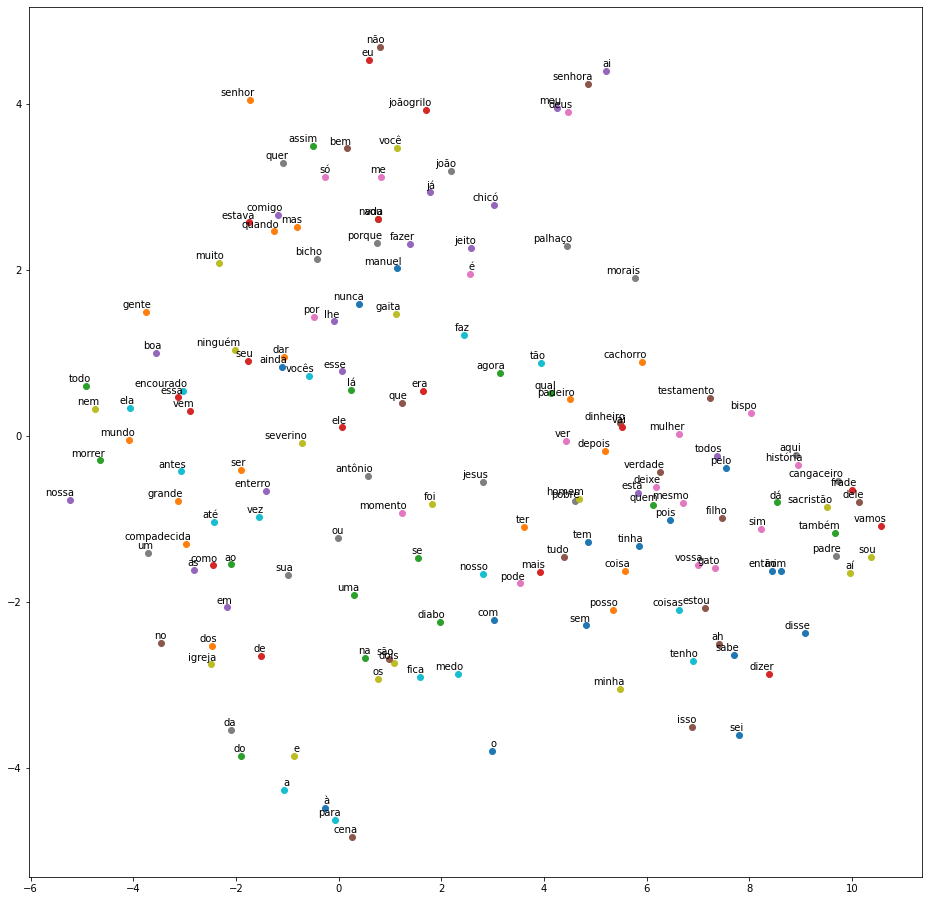

In [117]:
tsne_plot(model)

In [118]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


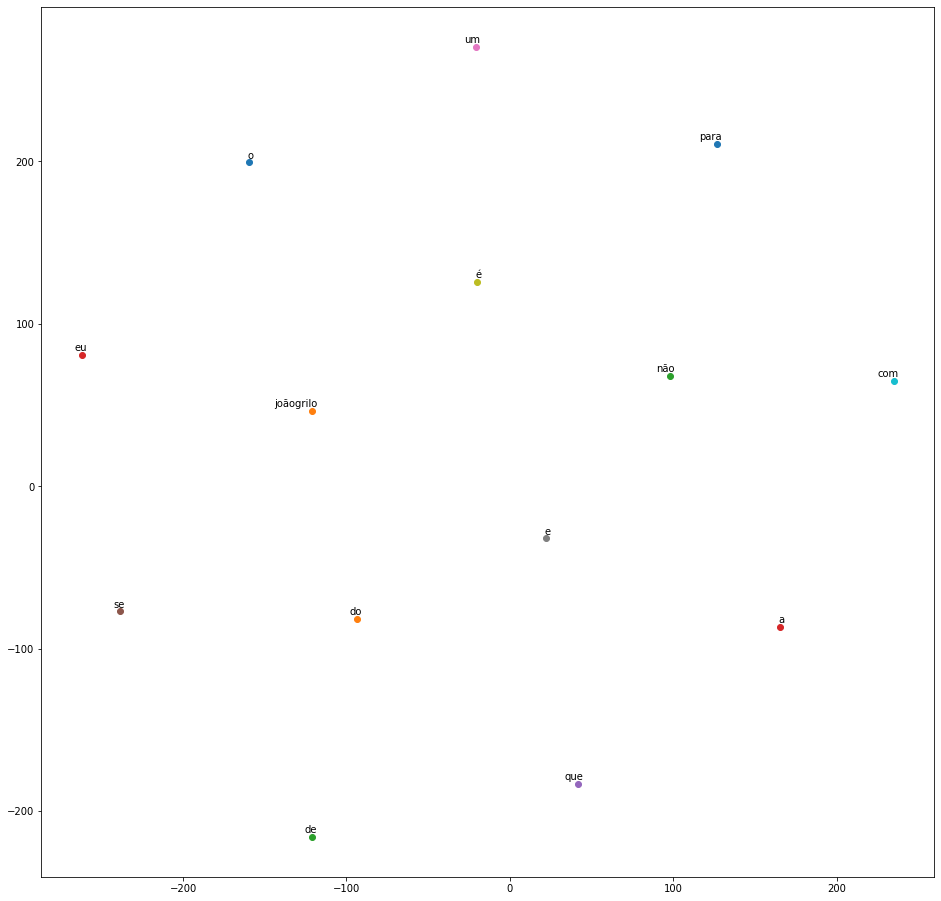

In [62]:
tsne_plot(model)

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


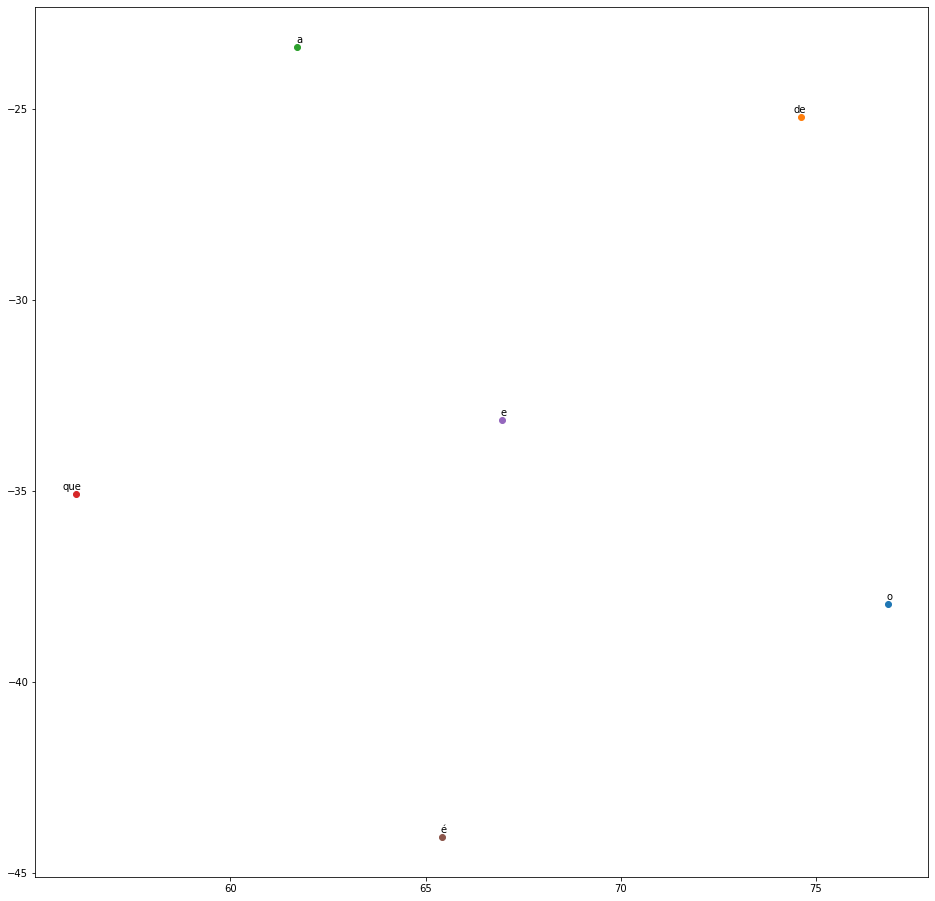

In [119]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


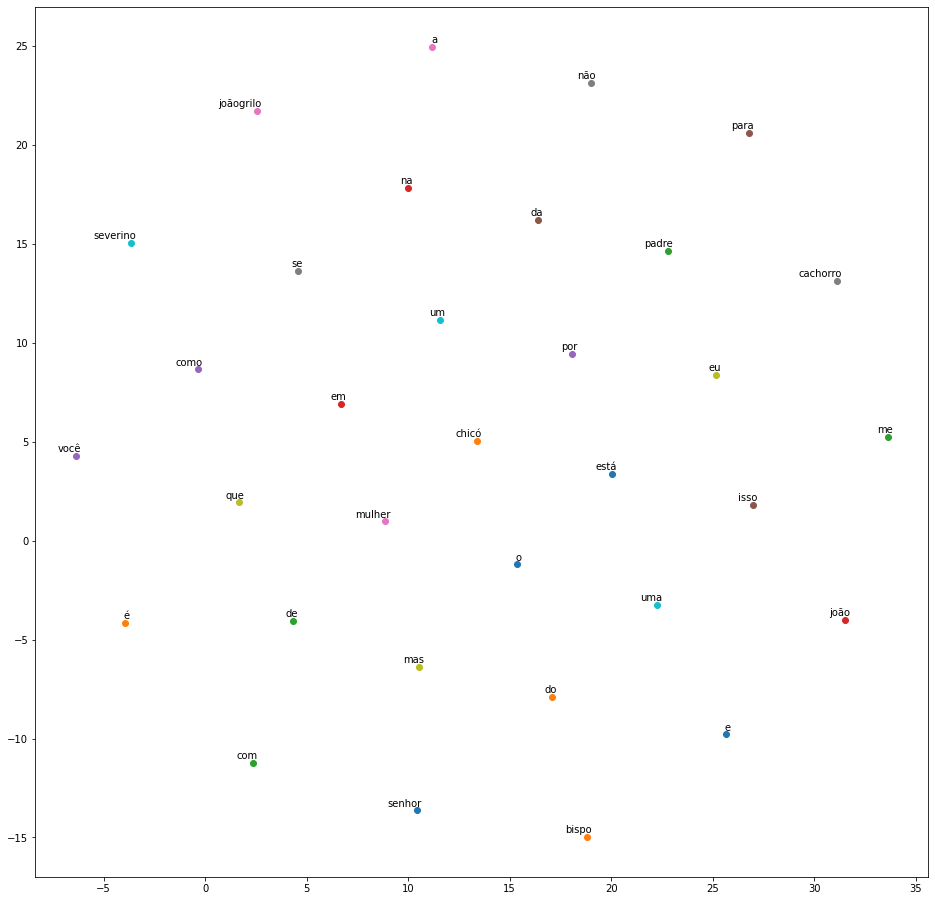

In [120]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [121]:
model.most_similar('padre')

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('é', 0.9994009733200073),
 ('que', 0.9993913173675537),
 ('o', 0.9993877410888672),
 ('de', 0.9993841052055359),
 ('a', 0.9993456602096558),
 ('cachorro', 0.9993427991867065),
 ('do', 0.9993265867233276),
 ('se', 0.9992778301239014),
 ('não', 0.9992732405662537),
 ('senhor', 0.999270498752594)]

In [67]:
model.most_similar('joãogrilo')

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('é', 0.9998728632926941),
 ('você', 0.9998711943626404),
 ('não', 0.9998688697814941),
 ('eu', 0.9998612999916077),
 ('me', 0.9998481273651123),
 ('por', 0.9998419880867004),
 ('com', 0.9998393654823303),
 ('está', 0.999836802482605),
 ('que', 0.9998313188552856),
 ('isso', 0.9998285174369812)]

In [68]:
model.most_similar('chicó')

/home/mardoniofranca/work/env/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('eu', 0.9998355507850647),
 ('joãogrilo', 0.9998234510421753),
 ('uma', 0.9998205304145813),
 ('me', 0.9997850656509399),
 ('padre', 0.9997818470001221),
 ('por', 0.999780535697937),
 ('com', 0.9997804164886475),
 ('você', 0.9997795820236206),
 ('é', 0.9997764825820923),
 ('não', 0.9997632503509521)]